In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('classic')

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import glob
import numpy as np

In [2]:
outpath_fig = './dataFolders/Output/Figures/v2/testColorScheme/'
outpath = './dataFolders/Output/Step6_FloralTypeConsolidatedData_AndFitParameters_v2/'

In [3]:
# Define exponential function func,  
# where a = alpha, b = Tau, c = y intercept

def fit_to_exponential(x, a, b, c):
     return a * np.exp(-(x / b)) + c

## example to make axis break

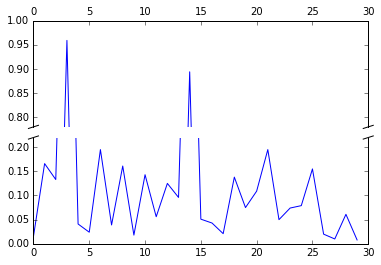

In [5]:
import matplotlib.pyplot as plt
import numpy as np


# 30 points between [0, 0.2) originally made using np.random.rand(30)*.2
pts = np.array([
    0.015, 0.166, 0.133, 0.159, 0.041, 0.024, 0.195, 0.039, 0.161, 0.018,
    0.143, 0.056, 0.125, 0.096, 0.094, 0.051, 0.043, 0.021, 0.138, 0.075,
    0.109, 0.195, 0.050, 0.074, 0.079, 0.155, 0.020, 0.010, 0.061, 0.008])
pts[[3, 14]] += .8

f, (ax, ax2) = plt.subplots(2, 1, sharex=True)
ax.plot(pts)
ax2.plot(pts)
ax.set_ylim(.78, 1.)  # outliers only
ax2.set_ylim(0, .22)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

f.subplots_adjust(hspace=0.1)

In [6]:
#set axis limits

xlim = 65
ylim = 60

0 39 0.05 93.4
c-1 fit: alpha= 10.082 , Tau= 1.392, y0= 3.204
0 32 0.13 55.93
c-2 fit: alpha= 7.385 , Tau= 0.661, y0= 3.781
0 51 0.01 40.79
c-3 fit: alpha= 3.861 , Tau= 1.663, y0= 6.282
0 63 0.01 51.9
c-10 fit: alpha= 1.915 , Tau= 24.336, y0= 7.496


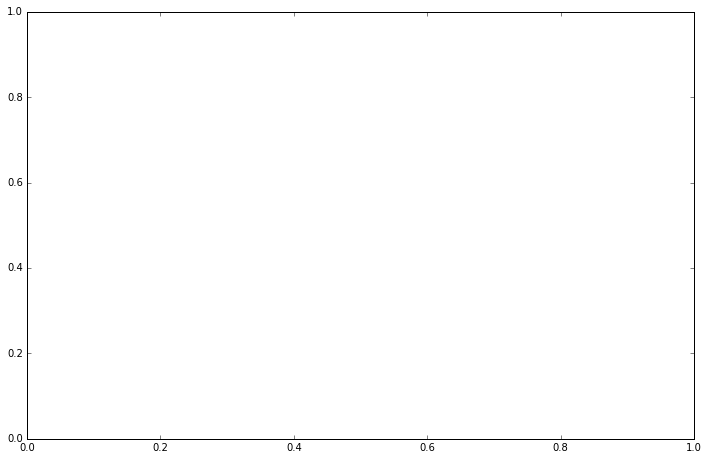

In [7]:
shapes = ['c-1', 'c-2','c-3', 'c-10']
colorScheme = ['#e5e534', '#a1dab4', '#41b6c4', '#225ea8']

f, ax = plt.subplots(figsize = (10,8))

for floralShape, i in zip(shapes, range(len(shapes))):
       
    file  = glob.glob(outpath + floralShape + '_Alltrials.csv')
    new_df = pd.read_csv(file[0])
    
    xdata = new_df.trialNum.values
    ydata = new_df.DiscoveryTime.values
    
    xdata_notnan = new_df[new_df.DiscoveryTime.notnull()].trialNum.values
    ydata_notnan = new_df[new_df.DiscoveryTime.notnull()].DiscoveryTime.values
    numMoth = len(new_df.name.unique())
    
    param_file = glob.glob(outpath + floralShape + '_FittedParameters.csv')
    param_df = pd.read_csv(param_file[0])
    
    idx = 1 # pick all the 1/4 length data from the parameter df (because 1/4 length data slope is = 0 across all shapes)
    a0 = param_df.loc[idx,'alpha']
    mean_y0 = param_df.loc[idx, 'y_intercept']
    tau = param_df.loc[idx, 'tau']
    
    # plot the final curve fit
    max_trial=max(xdata_notnan)

    
    ax.plot(xdata, ydata/100, 'o', color = 'gray', markersize=7, alpha = 0.5, label = 'Raw Data')
    ax.plot(range(0,max_trial), fit_to_exponential(range(0,max_trial), a0, tau , mean_y0), 
             'k--', linewidth=2)
    
#     ax2.plot(xdata, ydata/100, 'o', color = 'gray', markersize=7, alpha = 0.5, label = 'Raw Data')
#     ax2.plot(range(0,max_trial), fit_to_exponential(range(0,max_trial), a0, tau , mean_y0), 
#              'k--', linewidth=2)
    
#     ax.set_ylim(90, 100)  # outliers only
#     ax2.set_ylim(-5, 60)  # most of the data
    
    
#     # add kicks and set distance between two graphs
#     # hide the spines between ax and ax2
#     ax.spines['bottom'].set_visible(False)
#     ax2.spines['top'].set_visible(False)
#     ax.xaxis.tick_top()
#     ax.tick_params(labeltop='off')  # don't put tick labels at the top
#     ax2.xaxis.tick_bottom()

#     d = .005  # how big to make the diagonal lines in axes coordinates
#     # arguments to pass to plot, just so we don't keep repeating them
#     kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
#     ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
#     ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

#     kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
#     ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
#     ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

#     f.subplots_adjust(hspace=0.005)
    

    print(np.nanmin(xdata_notnan), np.nanmax(xdata_notnan), np.nanmin(ydata/100), np.nanmax(ydata/100))
    print(floralShape + ' fit: alpha= %5.3f , Tau= %5.3f, y0= %5.3f' %(a0, tau, mean_y0))
    
    
    ax.set_title(floralShape, y=1.2)
    ax.set_xlabel('Visit Number')
    ax.set_ylabel('Exploration Time (second)')
    ax.grid()
#     ax2.grid()
#     leg = plt.legend()
#     leg.get_frame().set_linewidth(1.5)
#     ax.legend(bbox_to_anchor=(0., 1.05, 1., .102), loc=3, mode="expand", borderaxespad=0.)
    
    
    ax.set_xlim([-5,xlim])
    ax.set_ylim([-5,ylim])
    ax.text(50, 40, floralShape + ' N= ' + str(numMoth))
    f.tight_layout()
    f.savefig(outpath_fig + floralShape + 'LearningOverTime_withClippedData.pdf', transparent=True)
    ax.cla()
    ax2.cla()

## plot the data wrt time (not visit number)

109.05 2082.97 0.05 93.4
c-1 fit: alpha= 1.915 , Tau= 24.336, y0= 7.496
56.8 1978.19 0.13 55.93
c-2 fit: alpha= 1.915 , Tau= 24.336, y0= 7.496
134.91 1936.35 0.01 40.79
c-3 fit: alpha= 1.915 , Tau= 24.336, y0= 7.496
81.61 2016.91 0.01 51.9
c-10 fit: alpha= 1.915 , Tau= 24.336, y0= 7.496


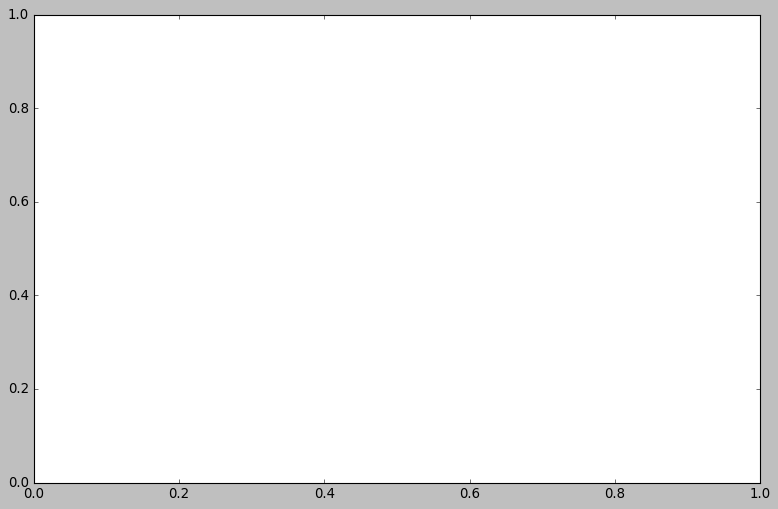

In [19]:
shapes = ['c-1', 'c-2','c-3', 'c-10']
colorScheme = ['#e5e534', '#a1dab4', '#41b6c4', '#225ea8']

f, ax = plt.subplots(figsize = (10,8))

for floralShape, i in zip(shapes, range(len(shapes))):
       
    file  = glob.glob(outpath + floralShape + '_Alltrials.csv')
    new_df = pd.read_csv(file[0])
    
    xdata = new_df.MothIn.values/100
    ydata = new_df.DiscoveryTime.values
    
    xdata_notnan = new_df[new_df.DiscoveryTime.notnull()].MothIn.values/100
    ydata_notnan = new_df[new_df.DiscoveryTime.notnull()].DiscoveryTime.values
    numMoth = len(new_df.name.unique())
    
#     param_file = glob.glob(outpath + floralShape + '_FittedParameters.csv')
#     param_df = pd.read_csv(param_file[0])
    
#     idx = 1 # pick all the 1/4 length data from the parameter df (because 1/4 length data slope is = 0 across all shapes)
#     a0 = param_df.loc[idx,'alpha']
#     mean_y0 = param_df.loc[idx, 'y_intercept']
#     tau = param_df.loc[idx, 'tau']
    
    # plot the final curve fit
    max_trial=max(xdata_notnan)
    
    ax.plot(xdata, ydata/100, 'o', color = 'gray', markersize=7, alpha = 0.5, label = 'Raw Data')
#     ax.plot(range(0,max_trial), fit_to_exponential(range(0,max_trial), a0, tau , mean_y0), 
#              'k--', linewidth=2)
    

    print(np.nanmin(xdata_notnan), np.nanmax(xdata_notnan), np.nanmin(ydata/100), np.nanmax(ydata/100))
    print(floralShape + ' fit: alpha= %5.3f , Tau= %5.3f, y0= %5.3f' %(a0, tau, mean_y0))
    
    
    ax.set_title(floralShape, y=1.2)
    ax.set_xlabel('Time (second)')
    ax.set_ylabel('Exploration Time (second)')
    ax.grid()  
   
    ax.set_xlim([0, 2100])
    ax.set_ylim([-5, 100])
    ax.text(0.5, 0.4, floralShape + ' N= ' + str(numMoth), transform=ax.transAxes)
    f.tight_layout()
    f.savefig(outpath_fig + floralShape + 'LearningOverTime_withAllData.pdf', transparent=True)
    ax.cla()
    ax2.cla()

In [14]:
new_df.head()

,Unnamed: 0,MothIn,MothOut,ProboscisDetect,DiscoveryTime,trialNum,name
0,0,31485,33858,31825.0,340.0,0,c-1_m10
1,1,35183,36433,35616.0,433.0,1,c-1_m10
2,2,37230,37741,37351.0,121.0,2,c-1_m10
3,3,38344,38965,38438.0,94.0,3,c-1_m10
4,4,41099,42613,41423.0,324.0,4,c-1_m10
